In [1]:
import numpy as np

from imblearn.combine import SPIDER

## Dataset
- Majority Class: Circles
- Minority Class: Diamonds
- Safe: Blue
- Noisy: Orange

__NOTE:__ With subsequent diagrams, the lower left is omitted visually to make the diagrams easier to digest.

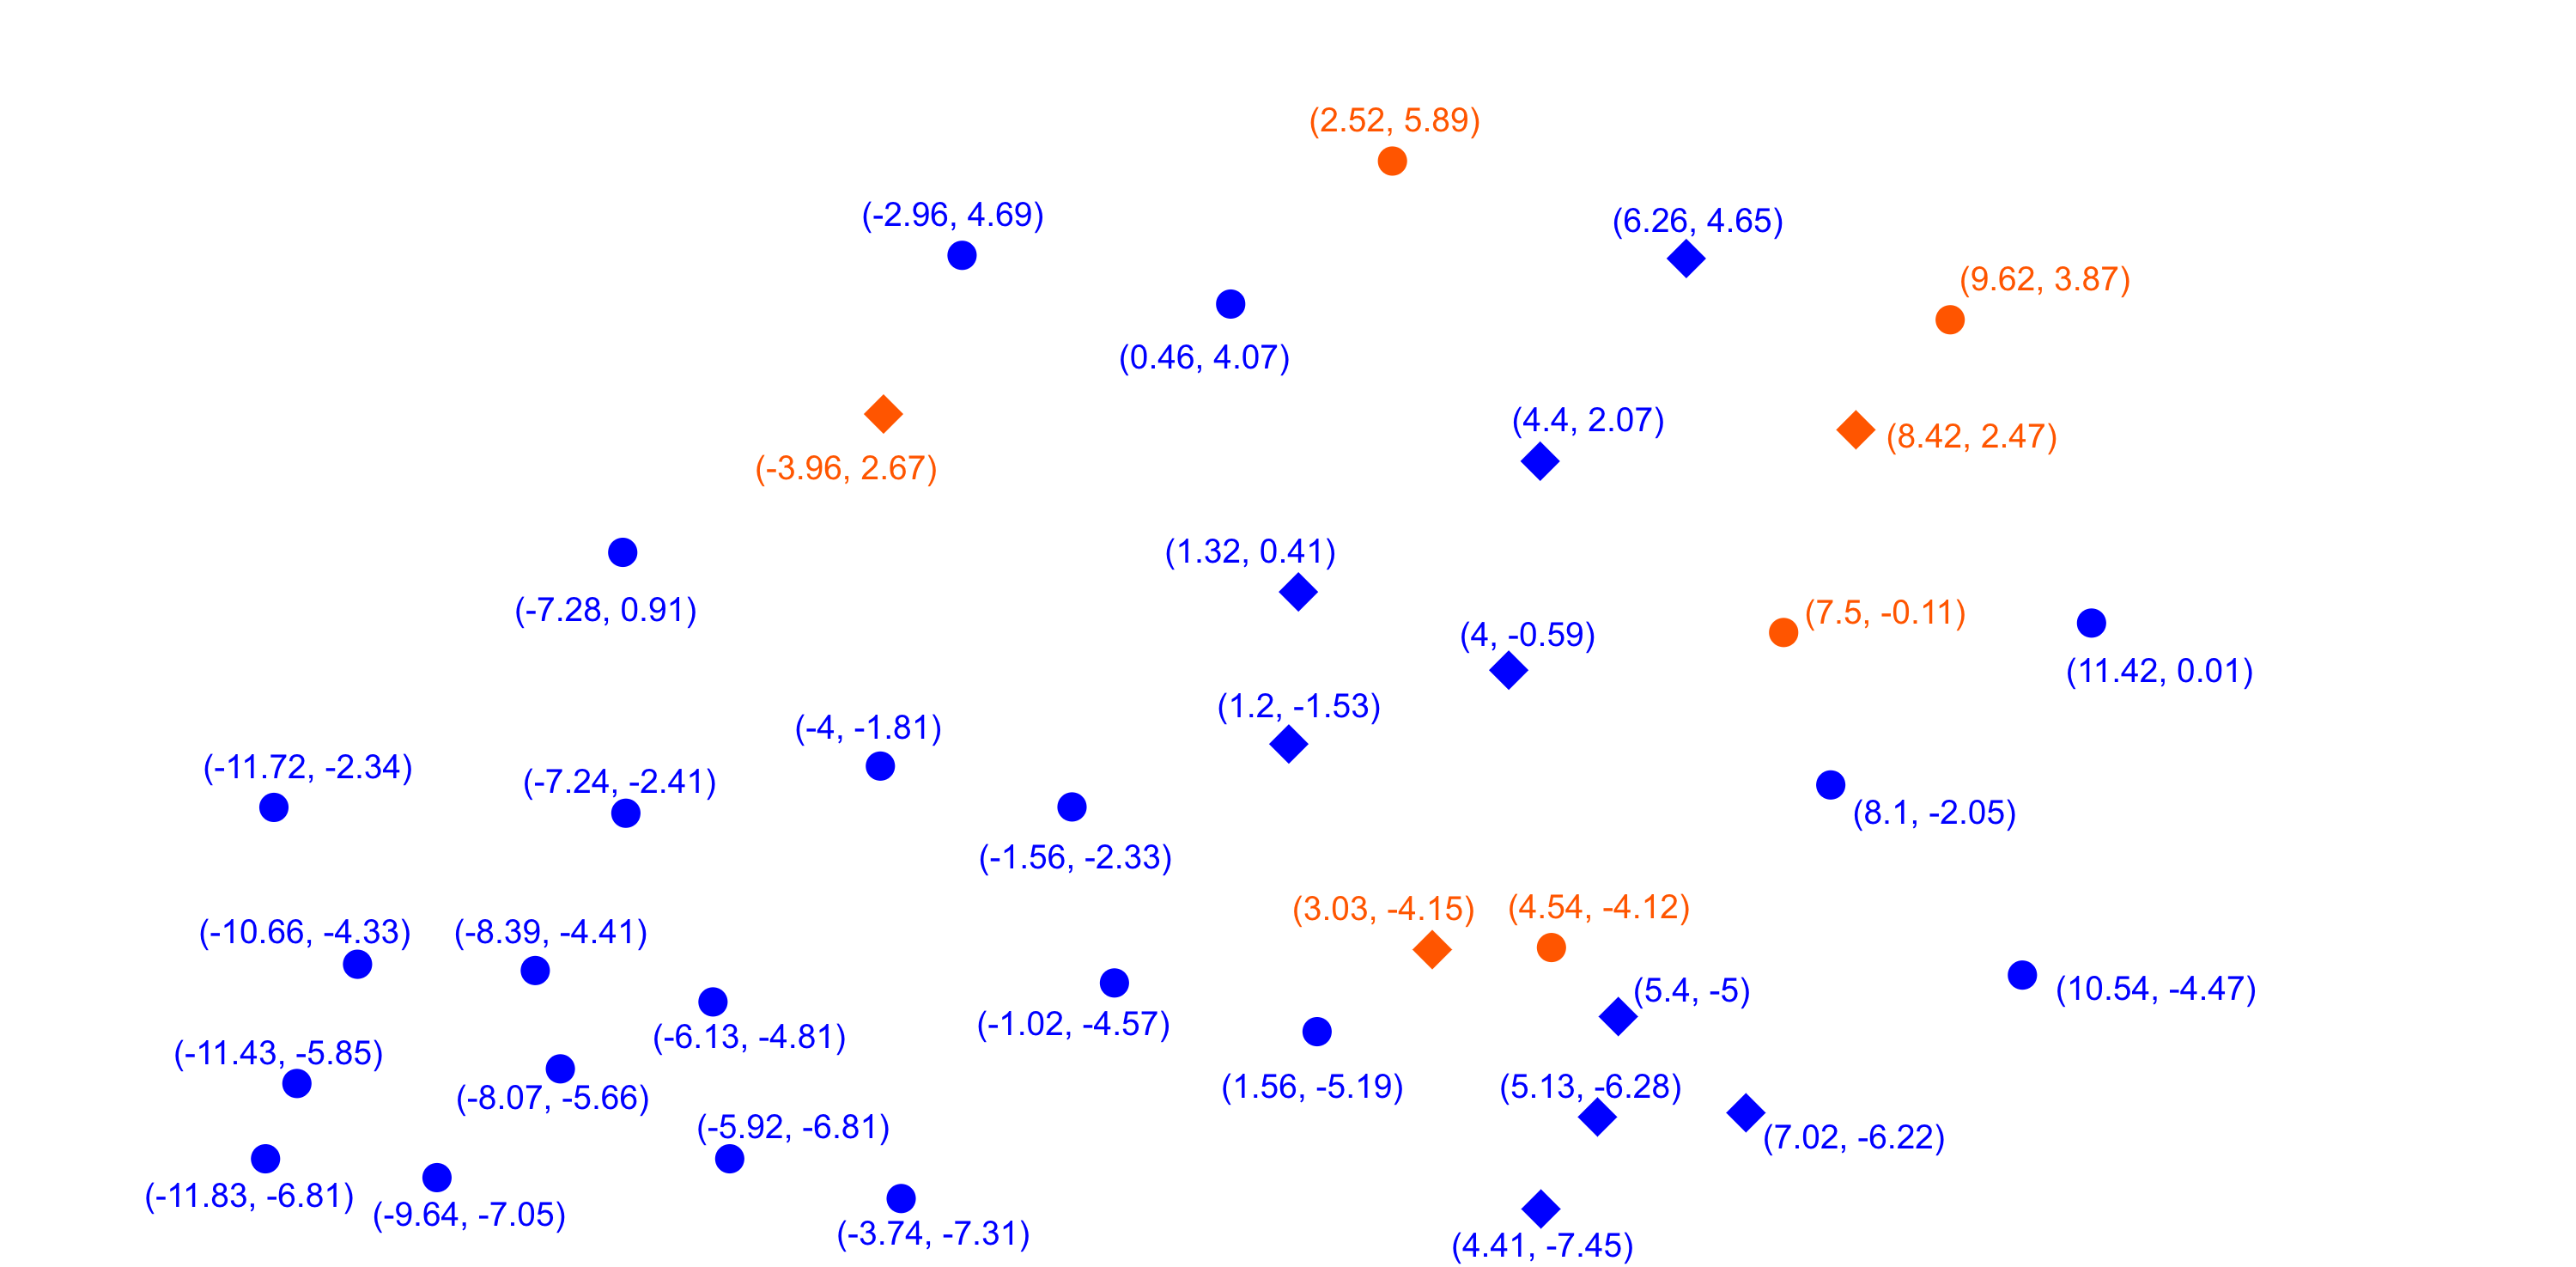

In [2]:
Xy = np.array([
    [-11.83, -6.81, 0],
    [-11.72, -2.34, 0],
    [-11.43, -5.85, 0],
    [-10.66, -4.33, 0],
    [ -9.64, -7.05, 0],
    [ -8.39, -4.41, 0],
    [ -8.07, -5.66, 0],
    [ -7.28,  0.91, 0],
    [ -7.24, -2.41, 0],
    [ -6.13, -4.81, 0],
    [ -5.92, -6.81, 0],
    [ -4.  , -1.81, 0],
    [ -3.96,  2.67, 1], # noisy
    [ -3.74, -7.31, 0],
    [ -2.96,  4.69, 0],
    [ -1.56, -2.33, 0],
    [ -1.02, -4.57, 0],
    [  0.46,  4.07, 0],
    [  1.2 , -1.53, 1],
    [  1.32,  0.41, 1],
    [  1.56, -5.19, 0],
    [  2.52,  5.89, 0], # noisy
    [  3.03, -4.15, 1], # noisy
    [  4.  , -0.59, 1],
    [  4.4 ,  2.07, 1],
    [  4.41, -7.45, 1],
    [  4.45, -4.12, 0], # noisy
    [  5.13, -6.28, 1],
    [  5.4 , -5   , 1],
    [  6.26,  4.65, 1],
    [  7.02, -6.22, 1],
    [  7.5 , -0.11, 0], # noisy
    [  8.1 , -2.05, 0],
    [  8.42,  2.47, 1], # noisy
    [  9.62,  3.87, 0], # noisy
    [ 10.54, -4.47, 0],
    [ 11.42,  0.01, 0],
])

X, y = np.split(Xy, [2], axis=1)

def check_results(kind, Xy_expected):
    X_expected, y_expected = np.split(Xy_expected, [2], axis=1)
    idx_expected = np.lexsort(X_expected.T)
    
    spider = SPIDER(kind=kind)
    X_resampled, y_resampled = spider.fit_resample(X, y.ravel())
    idx_resampled = np.lexsort(X_resampled.T)
    
    assert np.allclose(X_resampled[idx_resampled], X_expected[idx_expected])
    assert np.allclose(y_resampled[idx_resampled], y_expected.ravel()[idx_expected])

## Weak
- Noisy Minority Class neighborhoods with k = 3
- X denotes Noisy Majority Class to be removed from dataset
- The number of solid lines indicate the amplification amount for the Noisy Minority Class in the center of the neighborhood. *(Based on Safe Majority Class counts)*

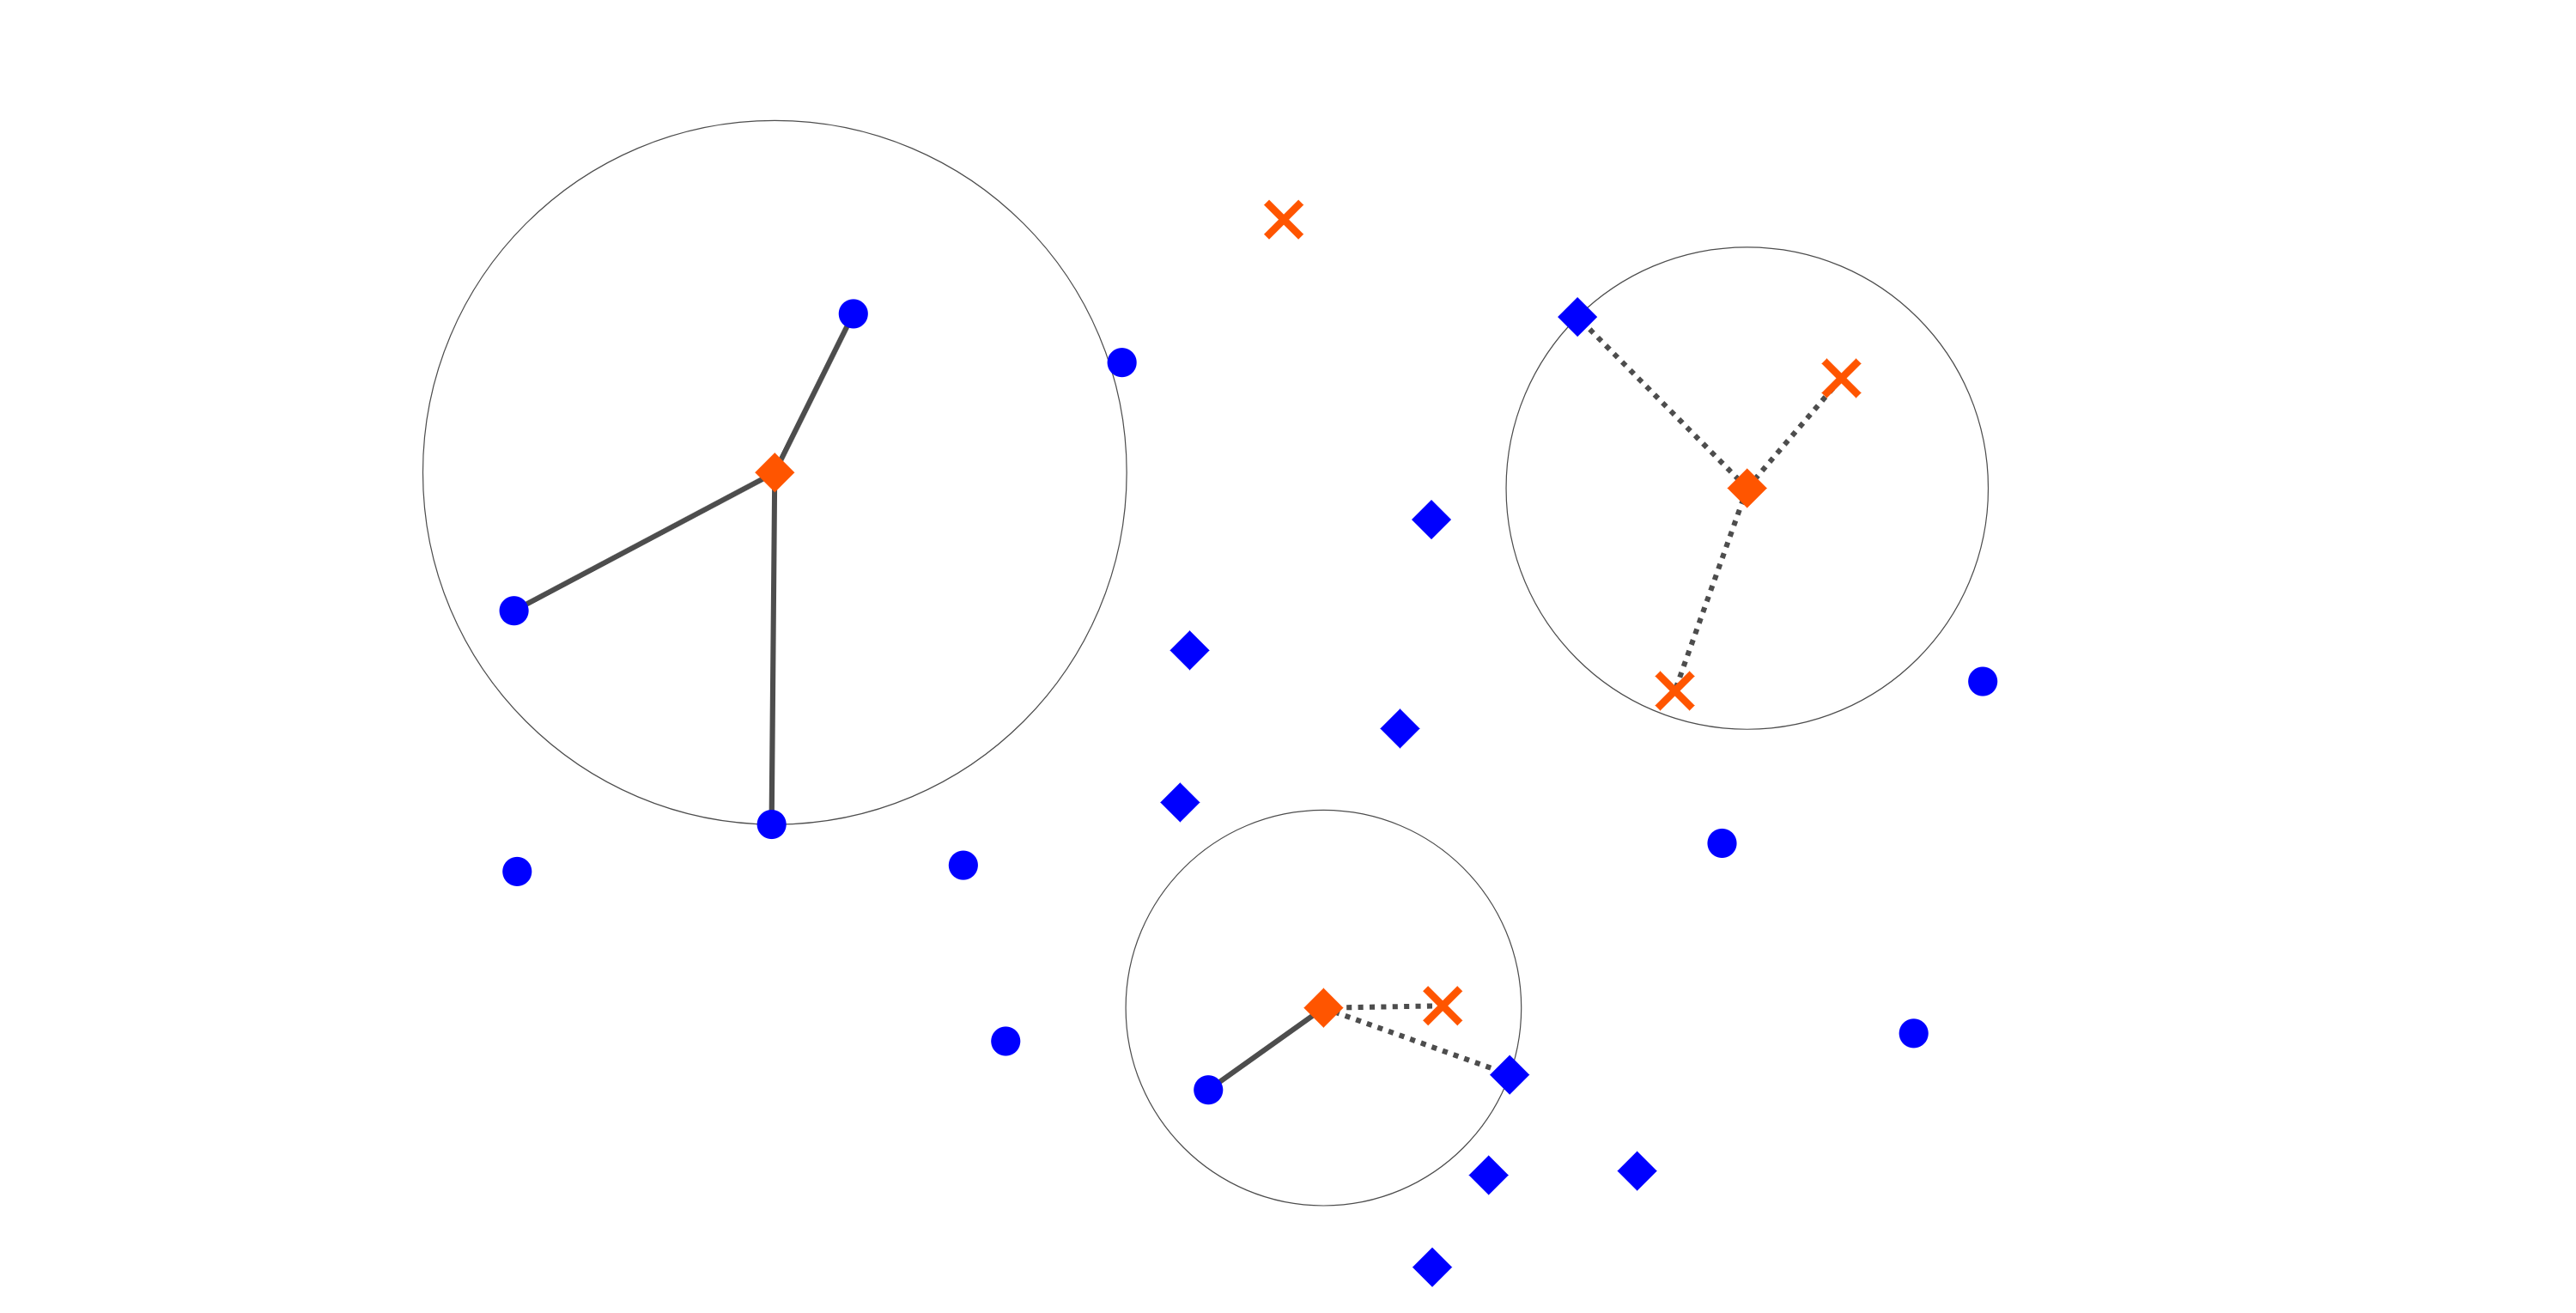

In [3]:
amp1 = np.vstack([[ -3.96,  2.67, 1]] * 3)
amp2 = np.vstack([[  3.03, -4.15, 1]] * 1)
# amp3 = np.vstack([[  8.42,  2.47, 1]] * 0)
amplify = np.vstack([amp1, amp2])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_weak = np.vstack([Xy[~mask], amplify])
check_results('weak', Xy_expected_weak)

## Relabel
- Noisy Minority Class neighborhoods with k = 3
- X denotes Noisy Majority Class to be removed from dataset
- \+ denotes Noisy Majority Class to be relabeled as Minority Class.
- The number of solid lines indicate the amplification amount for the Noisy Minority Class in the center of the neighborhood. *(Based on Safe Majority Class counts)*

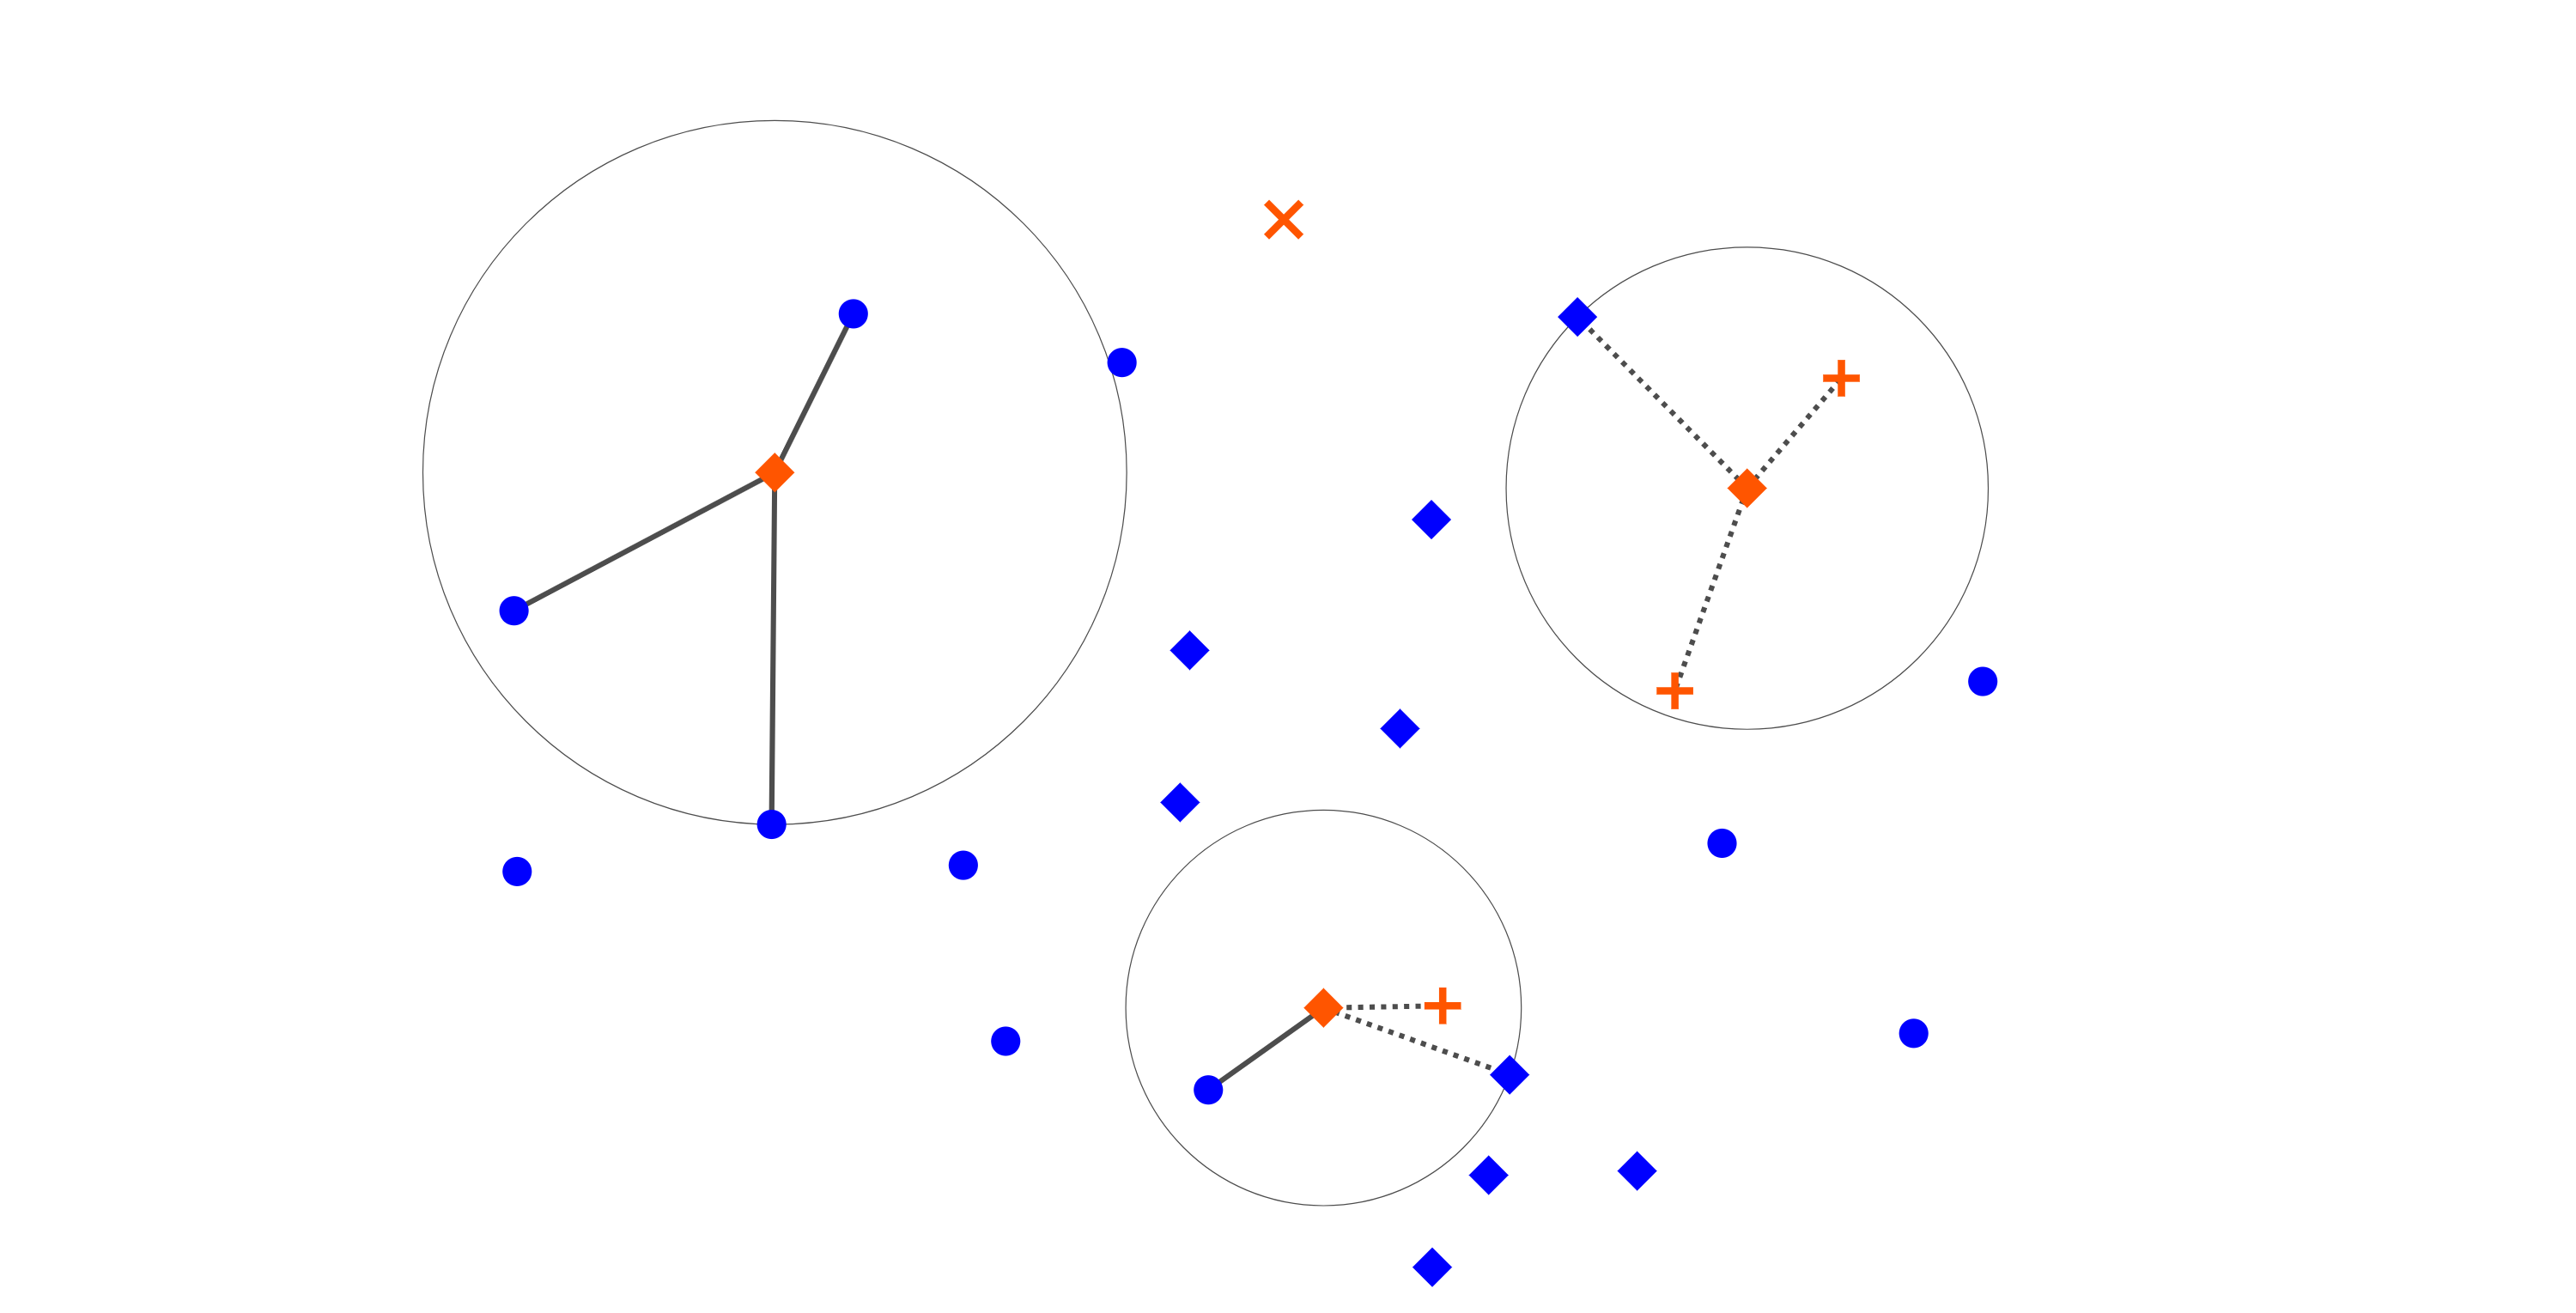

In [4]:
amp1 = np.vstack([[ -3.96,  2.67, 1]] * 3)
amp2 = np.vstack([[  3.03, -4.15, 1]] * 1)
# amp3 = np.vstack([[  8.42,  2.47, 1]] * 0)
amplify = np.vstack([amp1, amp2])

relabel = np.array([
    [  4.45, -4.12, 1],
    [  7.5 , -0.11, 1],
    [  9.62,  3.87, 1]
])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_relabel = np.vstack([Xy[~mask], amplify, relabel])

In [5]:
check_results('relabel', Xy_expected_relabel)

## Strong
### Phase 1
- Safe Minority Class neihborhoods with k = 3
- X denotes Noisy Majority Class to be removed from dataset
- Only one neighborhood in this example will be amplified since it is the only one that has a Safe Majority Class neighbor. This is indicated in the circle with lines.
- The number of solid lines indicate the amplification amount for the Noisy Minority Class in the center of the neighborhood.

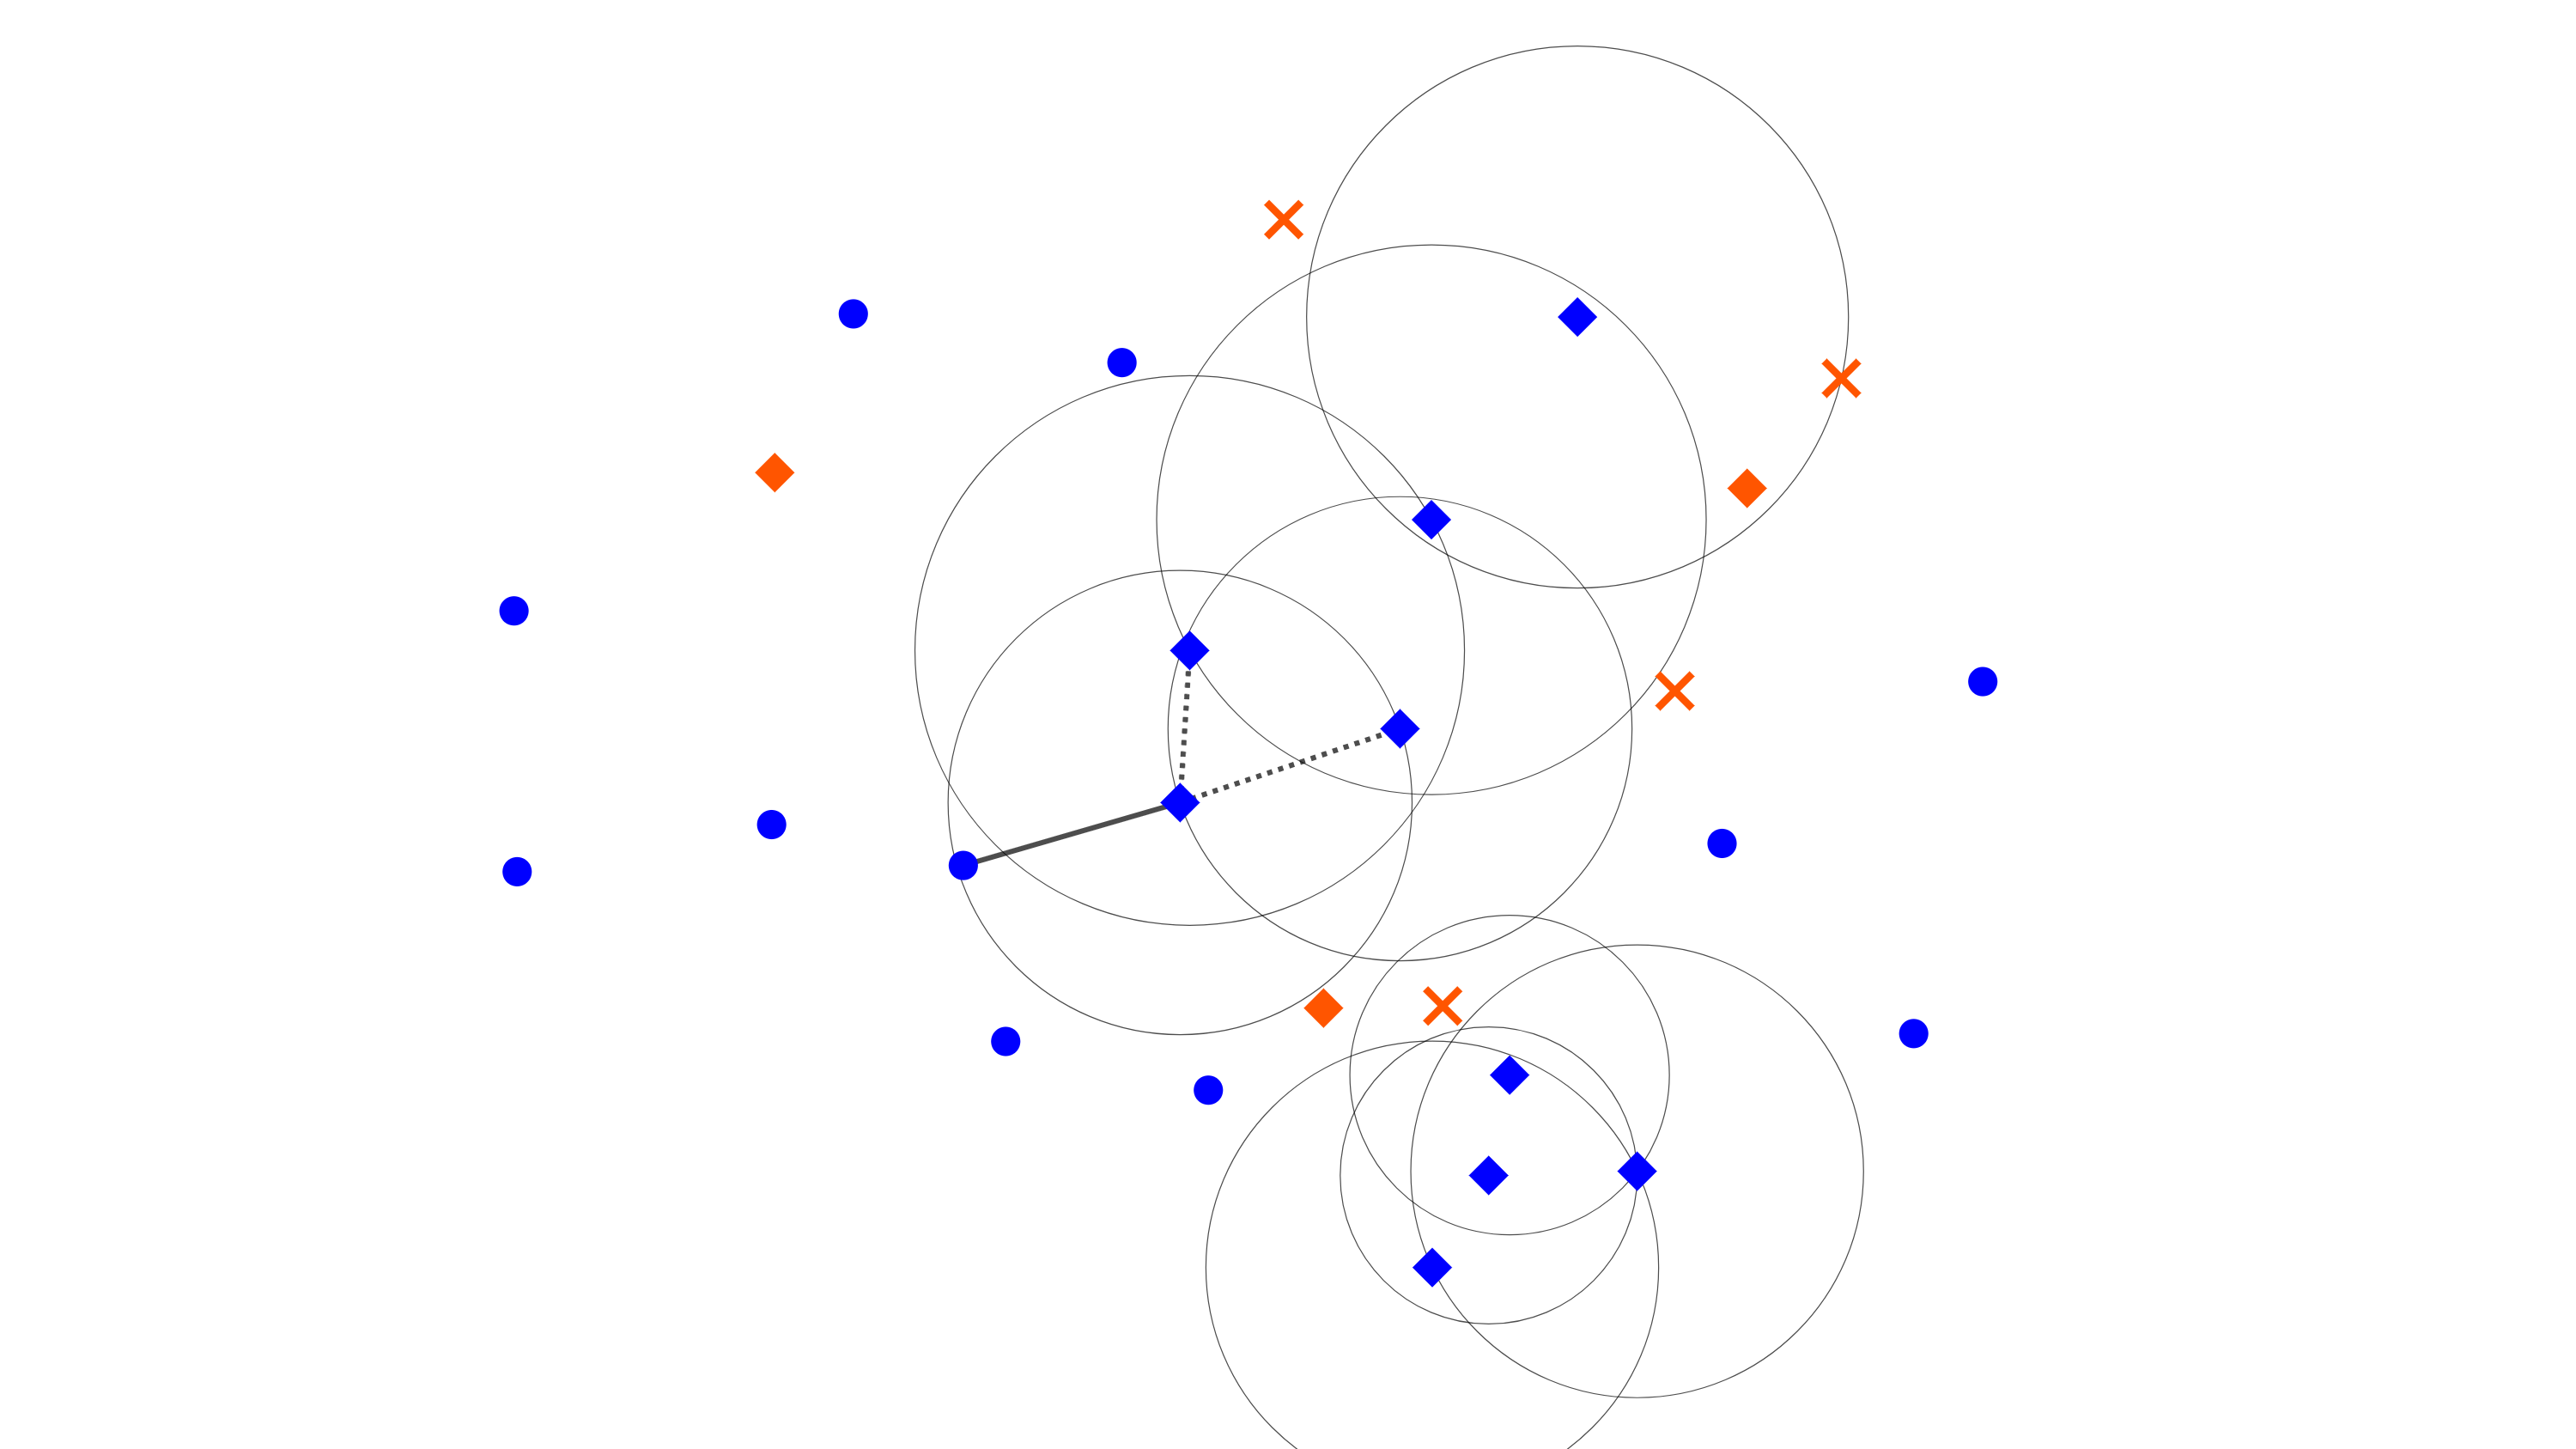

### Phase 2
- With neighborhoods with k = 5, check if the Noisy Minority Class samples are correctly classified by KNN
    - If Yes: Amplify with neighborhood with k = 3
    - Else No: Amplify with neighborhood with k = 5
- X denotes Noisy Majority Class to be removed from dataset (same as in phase 1)
- The number of solid lines indicate the amplification amount for the Noisy Minority Class in the center of the neighborhood.

In [6]:
amp_safe_1 = np.vstack([[  1.2 , -1.53, 1]] * 1)

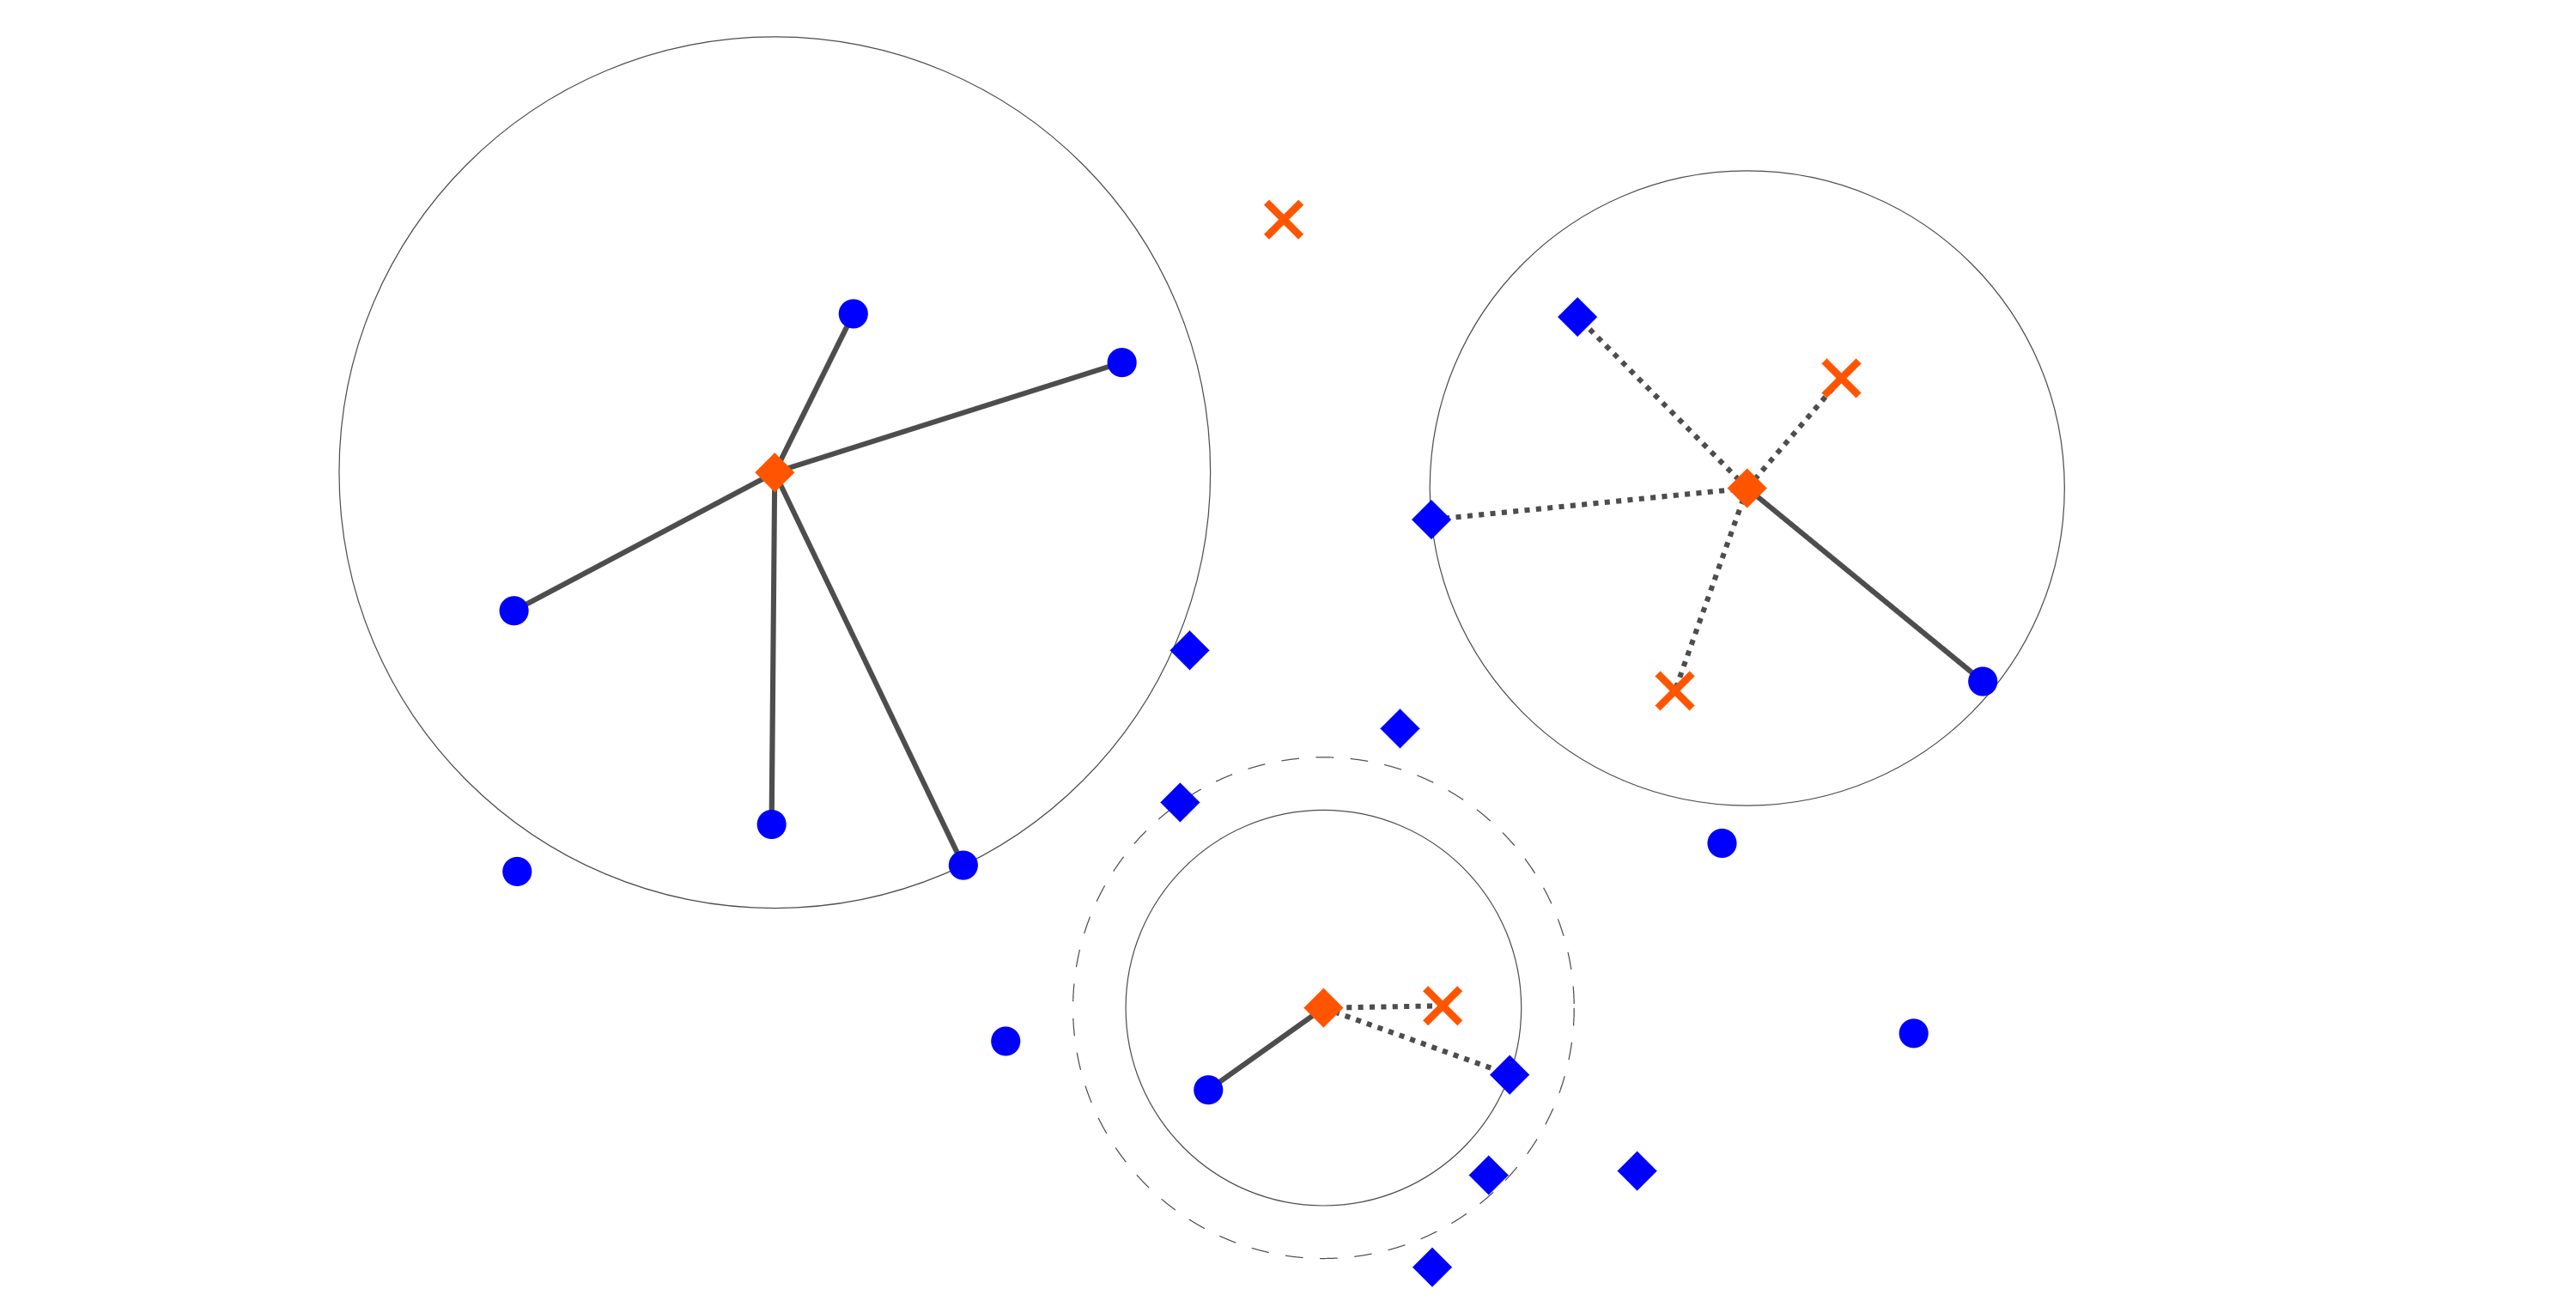

In [7]:
amp_noise_1 = np.vstack([[ -3.96,  2.67, 1]] * 5)
amp_noise_2 = np.vstack([[  3.03, -4.15, 1]] * 1)
amp_noise_3 = np.vstack([[  8.42,  2.47, 1]] * 1)
amplify = np.vstack([amp_safe_1, amp_noise_1, amp_noise_2, amp_noise_3])

remove = np.array([
    [  2.52,  5.89, 0],
    [  4.45, -4.12, 0],
    [  7.5 , -0.11, 0],
    [  9.62,  3.87, 0]
])
mask = np.isin(Xy, remove).all(axis=1)

Xy_expected_strong = np.vstack([Xy[~mask], amplify])
check_results('strong', Xy_expected_strong)